# Neural Networks

**Recitation by Dr. Duygu Ataman**

_10/27/2023, 09:30, 14:00 at Room 150_

_10/27/2023, 10:45, 15:15 Office Hours at Room 350 (For any follow-up questions)_

Please find the notebook on the link:
https://colab.research.google.com/drive/1-6dRNNqjEli3khGZPfNbz60UJsZ9iLHM?usp=sharing
and make a copy of it in your own Google Drive. This notebook aims to introduce the perceptron algorithm and feed-forward neural networks for classification and regression problems.

## Classification of non-linearly separable dataset using multi-layer perceptron

Past sessions have studied linear separability and how different classification problems can be solved with linear models. If however the data is not linearly separable, we may need more complex models for learning to make accurate predictions. Let's start our demonstration by building a neural network model using PyTorch and use it to classify a toy data set which is not linearly separable.

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive/FML/Lab8')

# some predefined helper functions provided for plotting data and model outputs
from plot_lib import plot_data, plot_model, set_default


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
set_default()

In [ ]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

### Create the dataset
We will now create a data set consisting of three classes and is in the shape of a spiral.

In [ ]:
X = torch.zeros(N * C, D)
y = torch.zeros(N * C, dtype=torch.long)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2

    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


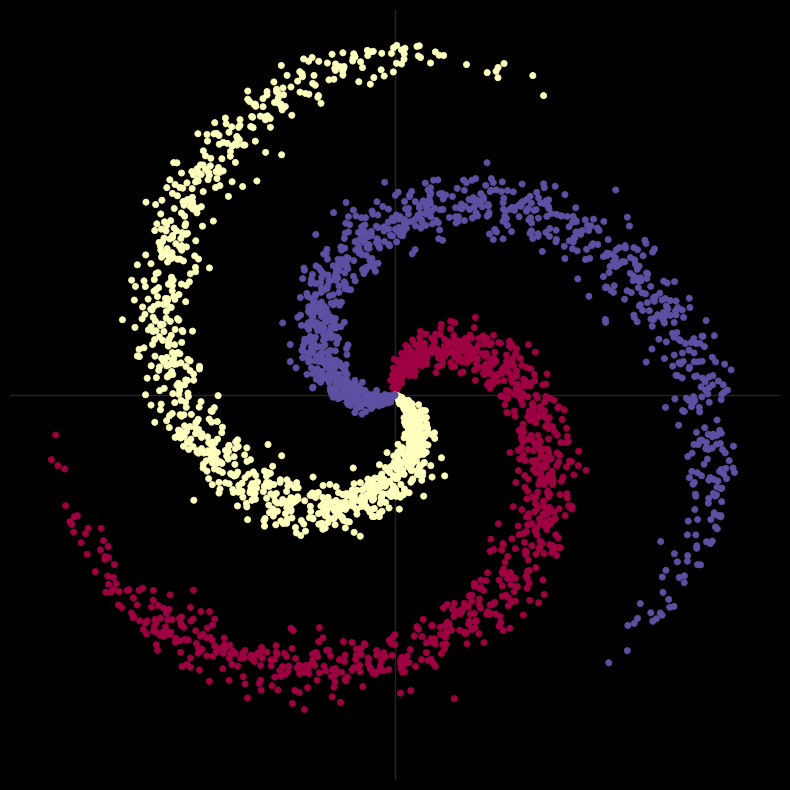

In [ ]:
# visualise the data using the plot_data function provided as a helper function
plot_data(X, y)

### Linear Model
We now define a linear classification model using PyTorch and train it using stochastic gradient descent with the help of the autograd package.

Let's start by initializing the hyper-parameter values such as the learning rate, regularization coefficient etc.

In [ ]:
learning_rate = 1e-3
steps = 1000 # num. of training steps

Create the linear model and print it.

In [ ]:
# nn package to create our linear model. Notice the Sequential container class.
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# Print the model
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


Create the training loop and print the metrics (loss and accuracy) at the end of each iteration.

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for t in range(steps):

    # Forward pass over the model to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.861539, [ACCURACY]: 0.504


We can now plot the output of the model (in this case a collection of hyper-planes):

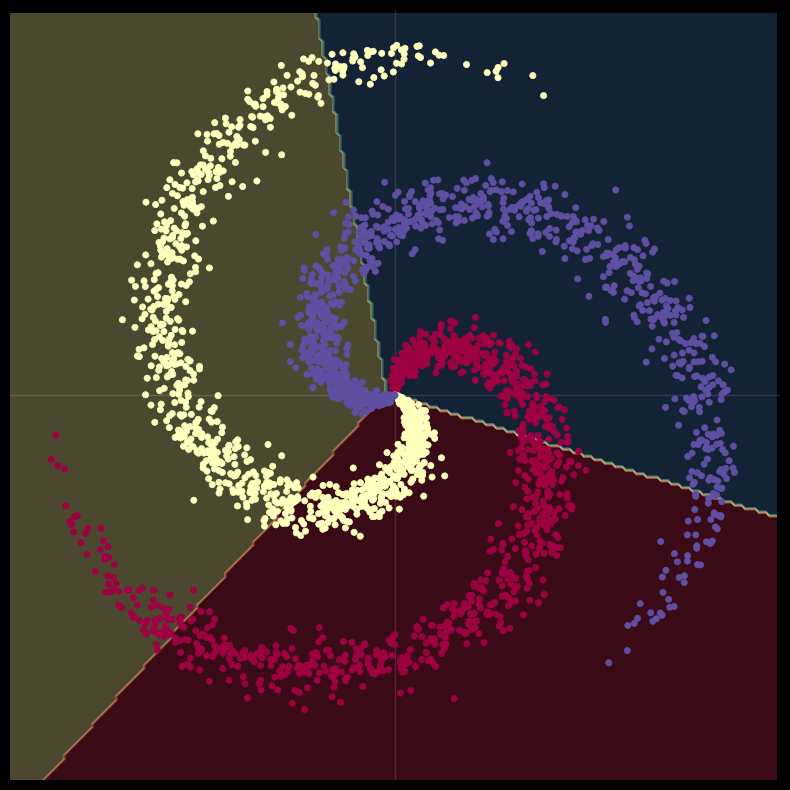

In [ ]:
# Plot trained model
plot_model(X, y, model)

### Two-layer neural network
We now define a two layer (single hidden layer) neural network model using PyTorch and train it using stochastic gradient descent with the help of the autograd package.

We will extend our linear model with ReLU as the activation units to create a multi-layer perceptron.

In [ ]:
# Initialize the hyper-parameters
learning_rate = 1e-3

# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


Let's use the new model to perform the classification task on the same data set and observe the accuracy.

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training
for t in range(steps):

    # Forward pass over the model to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.975846, [ACCURACY]: 0.503


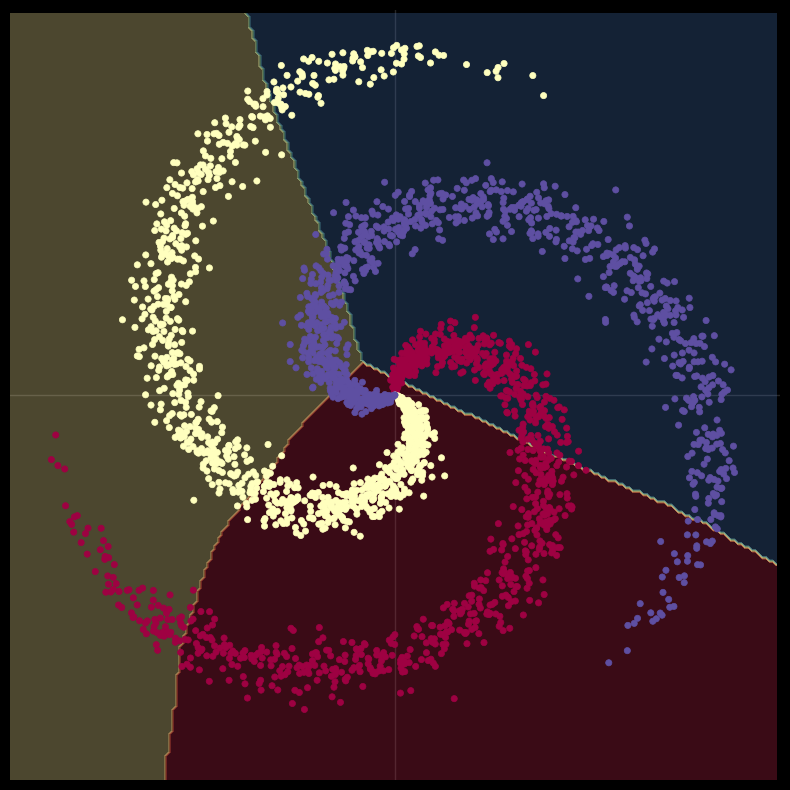

In [ ]:
# Plot trained model
plot_model(X, y, model)

## Exercise 1

Experiment with the perceptron model by adding more hidden layers to the nn.Sequential module, such that there are more linear layers and activations to better extract more information useful for classification. Note that in between hidden layers we typically use Tanh activations (available in PyTorch as nn.Tanh()).

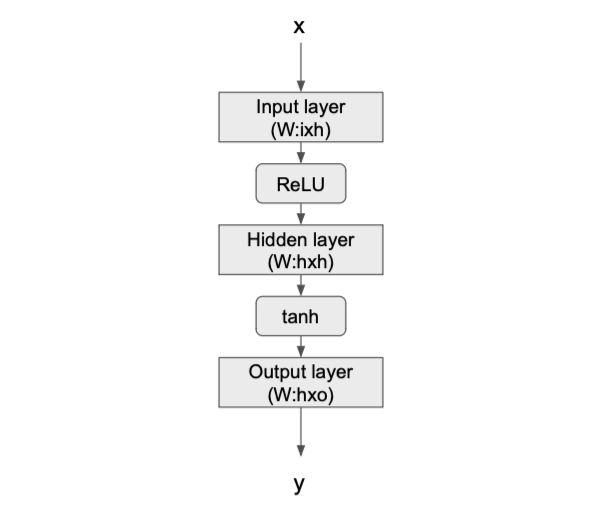

Train the model again and observe the accuracy, whether it is changed or not. Experiment with learning rates and ensure the model is converged.

In [80]:
## To-Do

# Initialize the hyper-parameters
learning_rate = 1e-1

# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


steps = 2000
# Training
for t in range(steps):

    # Forward pass over the model to get the logits
    y_pred = model(X)

    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)

    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()

    # Update params
    optimizer.step()

[EPOCH]: 1999, [LOSS]: -0.000000, [ACCURACY]: 0.000


In [79]:
# Plot trained model
plot_model(X, y, model)

RuntimeError: ignored

## Regression

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.  

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [ ]:
set_default()

Let's create a new data set.

In [ ]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

In [ ]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(3) + 0.3 * torch.rand(X.size())

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

In [ ]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

### Linear model

Let's start again by creating a linear regression model to predict this function approximation. We can initialize the values of the hyper-parameters and create a Linear module with PyTorch as follows.

In [ ]:
# Initialize hyper-parameters
learning_rate = 1e-3
steps = 1000

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# print the model
print(model)

Let's train our linear model using the training loop.

In [ ]:
# we use MSE (mean squared error) loss from the nn package for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # built-in L2

# Training loop
for t in range(1000):

    # forward pass over the model to get the logits (inputs to the loss function)
    y_pred = model(X)

    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)

    # zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass to compute the gradient of loss w.r.t our learnable params
    loss.backward()

    # Update params
    optimizer.step()

In [ ]:
# Plot trained model
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Please take a moment to play with the values of the hyper-parameters and the value of H (number of hidden units) to observe the change in the models being learnt.

## Two-layer Network

Let's now implement a two layer multi-layer perceptron for the regression task. We will build 10 separate models, each with the same architecture but having different initial values of the parameters (weights and biases). This is to show the effect of local minima on model training.

Initialize the hyper-parameters:

In [ ]:
learning_rate = 1e-3
steps = 1000

Create the models. Half of the models have ReLU activations and the other half have TanH activations.

In [ ]:
# Number of networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(H, C)
    )

    # Append models
    models.append(model)

Print the models:

In [ ]:
print(models[0], models[-1])

Create the training loop over the 10 models:

In [ ]:
for mod in range(n_networks):
    # select the i-th model
    model = models[mod]

    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # Training loop
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)

        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params.
        loss.backward()

        # Update params
        optimizer.step()

### Predictions: Before Training

These are how the model predictions were before training:

In [ ]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)

    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

### Predictions: After Training

These features show how predictions changed after training:

In [ ]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)

## Exercise 2

Let's now revisit our weather forecasting application for NYC.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

class WeatherDataset(Dataset):
  def __init__(self, train_in, train_out):
        # Initialize data
        self.n_samples = train_in.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = train_in # size [n_samples, n_features]
        self.y_data = train_out # size [n_samples, 1]

  # support indexing such that dataset[i] can be used to get i-th sample
  def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

  # we can call len(dataset) to return the size
  def __len__(self):
      return self.n_samples

def process_csv(filename):
  drive.mount('/content/drive')
  df = pd.read_csv(filename)

  # Filter data and apply normalization
  df = df.dropna()
  datatensor = torch.tensor(df.values[1:,1::].astype(float))
  datatensor = torch.nn.functional.normalize(datatensor)

  # Randomly select 80% of the examples for training,
  # remaining 20% will be for testing
  train, test = torch.utils.data.random_split(datatensor, [0.8, 0.2])
  traindata = torch.stack([t for t in train])
  testdata = torch.stack([t for t in test])

  # We can create separate tensors to input and output to the model
  train_in = torch.cat([traindata[:,0:2], traindata[:,3::]], dim=1)
  test_in = torch.cat([testdata[:,0:2], testdata[:,3::]], dim=1)
  train_out = traindata[:,2].unsqueeze(1) # we will use 3rd column as target prediction
  test_out = testdata[:,2].unsqueeze(1)
  train_out = (train_out > 0).double()
  test_out = (test_out > 0).double()
  return train_in, train_out, test_in, test_out

def train(model, loss, optimizer, \
          trainingData, \
          learning_rate, steps, batch_size):

  loader = iter(DataLoader(dataset=trainingData, batch_size=batch_size, shuffle=True))

  losses = []; step = 0
  for step in range(0, steps):
    input, target = next(loader)
    optimizer.zero_grad() # reset gradiant value to zero
    model.double()
    output = model(input) # pass input to model
    err = loss(output, target) # compute mean squared error between model prediction and target value
    err.backward() # evaluate the gradient
    optimizer.step() # propagate the evaluated gradient to update parameters

    print('step {step}, loss {err.item()}')
    display.clear_output(wait=True)

Now let's define a multi-layer perceptron for our rain prediction task.

In [ ]:
## To-Do: Define a Network with 1 input, 1 hidden and 1 output layer.
D = 8
H = 100
C = 1

model = torch.nn.Sequential(
    nn.Linear(D,H),
    nn.ReLu,
    nn.Linear(H,C)
)

We will use the new model for prediction the probability of rain.

In [ ]:
# Load the data
dataset = '/content/drive/MyDrive/473-Fall23-Recitation/Fall2023-473-Lab8/NYC_Weather_2016_2022.csv'
train_in, train_out, test_in, test_out = process_csv(dataset)
trainingData = WeatherDataset(train_in, train_out)

# Initialize hyper-parameters
learning_rate = 0.5
steps = 150
batch_size = 128

# Define loss and optimizer
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train
train(model, loss, optimizer, trainingData, learning_rate, steps, batch_size)

with torch.no_grad(): # this signal informs torch that further operations will not need the gradient computation
  model_output = model(test_in)
  predictions = (model_output > 0.5)

  print("Accuracy of prediction is: ", torch.sum(predictions == test_out)/test_out.shape[0])
  precision = torch.logical_and(predictions, test_out).sum() / (predictions == 1).sum()
  recall = torch.logical_and(predictions, test_out).sum() / (test_out == 1).sum()
  print("Precision: ", precision)
  print("Recall: ", recall)